In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/home/ignis/Downloads/Food_Truck.csv")
df

,6.1101,17.592
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


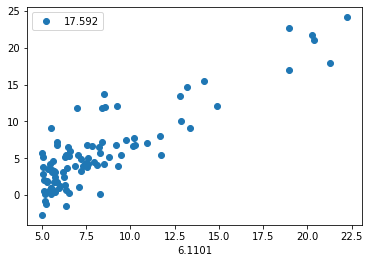

In [9]:
df.plot(x="6.1101", y="17.592", style="o")
plt.show()

In [10]:
x_mean = df["6.1101"].mean()
y_mean = df["17.592"].mean()
print(x_mean, y_mean)

8.181151041666668 5.716709375000001


In [13]:
df["x"] = df["6.1101"] - x_mean
df["y"] = df["17.592"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,6.1101,17.592,x,y,x*y,x^2,y^2
0,5.5277,9.13020,-2.653451,3.413491,-9.057530,7.040802,11.651918
1,8.5186,13.66200,0.337449,7.945291,2.681130,0.113872,63.127643
2,7.0032,11.85400,-1.177951,6.137291,-7.229428,1.387569,37.666336
3,5.8598,6.82330,-2.321351,1.106591,-2.568785,5.388671,1.224543
4,8.3829,11.88600,0.201749,6.169291,1.244648,0.040703,38.060147
...,...,...,...,...,...,...,...
91,5.8707,7.20290,-2.310451,1.486191,-3.433771,5.338184,2.208763
92,5.3054,1.98690,-2.875751,-3.729809,10.726003,8.269944,13.911478
93,8.2934,0.14454,0.112249,-5.572169,-0.625470,0.012600,31.049072
94,13.3940,9.05510,5.212849,3.338391,17.402526,27.173794,11.144852


In [14]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

1739.5603117330625 1433.4508245398956 2775.2783647179626


In [15]:
correlation = summation_x_y / (summation_x_squared *
summation_y_squared)**0.5
correlation

0.8721572919685902

In [18]:
def getMean(numbers):
 if len(numbers) == 0:
  return None
 else:
  current_sum = 0
  for i in numbers:
   current_sum += i
   current_avg = current_sum/len(numbers)
  return current_avg

In [19]:
def getStandardDeviation(numbers):
 if len(numbers) == 0:
  return 0
 else:
  mean = getMean(numbers)
  std_deviation = 0
  for i in numbers:
   std_deviation += (i - mean)**2
  return (std_deviation/len(numbers))**0.5

In [21]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

3.8641660707441887 5.37672294548257


In [22]:
m = correlation * (std_deviation_y / std_deviation_x)
m

1.2135472539083578

In [27]:
c = df["17.592"].mean() - m * df["6.1101"].mean()
c

-4.211504005424086

In [28]:
df["y_prediction"] = m * df["6.1101"] + c
df

,6.1101,17.592,x,y,x*y,x^2,y^2,y_prediction
0,5.5277,9.13020,-2.653451,3.413491,-9.057530,7.040802,11.651918,2.496621
1,8.5186,13.66200,0.337449,7.945291,2.681130,0.113872,63.127643,6.126220
2,7.0032,11.85400,-1.177951,6.137291,-7.229428,1.387569,37.666336,4.287210
3,5.8598,6.82330,-2.321351,1.106591,-2.568785,5.388671,1.224543,2.899640
4,8.3829,11.88600,0.201749,6.169291,1.244648,0.040703,38.060147,5.961541
...,...,...,...,...,...,...,...,...
91,5.8707,7.20290,-2.310451,1.486191,-3.433771,5.338184,2.208763,2.912868
92,5.3054,1.98690,-2.875751,-3.729809,10.726003,8.269944,13.911478,2.226850
93,8.2934,0.14454,0.112249,-5.572169,-0.625470,0.012600,31.049072,5.852929
94,13.3940,9.05510,5.212849,3.338391,17.402526,27.173794,11.144852,12.042748


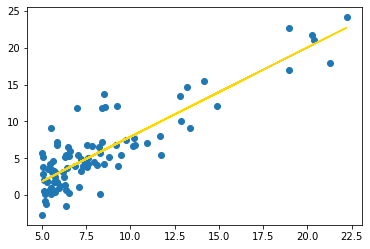

In [32]:
plot1 = plt.scatter(df["6.1101"], df["17.592"])
plot2 = plt.plot(df["6.1101"], df["y_prediction"],color="gold")
plt.show()